# Matplotlib Cheetsheet
The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

1. Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
面向对象的axes格式
2. Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.
函数式编程的plt格式

！ 推荐使用面向对象的方法

## 1.1 Anatomy of a figure

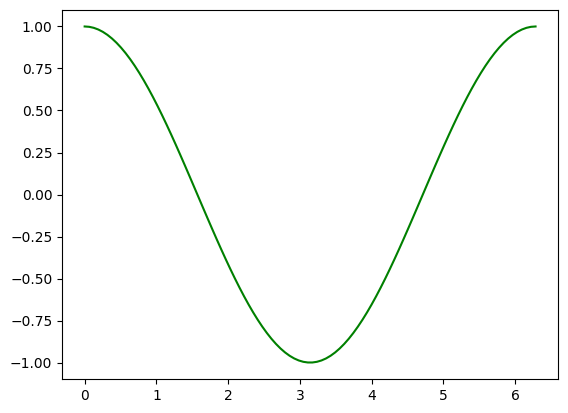

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

X=np.linspace(0,2*np.pi,100)
Y=np.cos(X)

# 创建figure对象，和figure中的axes对象，后续绘图的操作主要是在ax中进行的
fig,ax=plt.subplots()
# 对ax使用新的方法,方法可以分为Basic Plot和Advanced plot
ax.plot(X,Y,color='green')
# 对figure对象可以进行保存、展示的方法
fig.show()
fig.savefig('../img/hello_world.PDF')

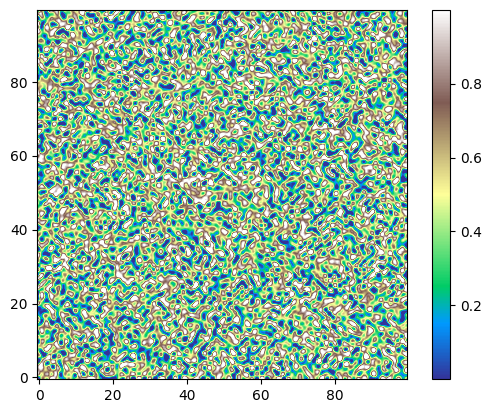

In [55]:
# numpy 生成随机二维数组

Z=np.random.rand(100,100)
# 创建figure对象，和figure中的axes对象，后续绘图的操作主要是在ax中进行的
fig,ax=plt.subplots()
# 对ax使用新的方法,方法可以分为Basic Plot和Advanced plot
img=ax.imshow(Z,cmap='terrain',origin='lower',interpolation='sinc')
# ax.imshow：创建并返回一个AxesImage对象，该对象可以用于后续的操作
# plt.imshow：创建并返回一个图像，并将图像设置为当前图像，然后通过plt.colorbar()进行颜色条的绘制
plt.colorbar(img)
fig.savefig('../img/imshow.PDF')

## 1.2 Matplotlib 中的axes设置

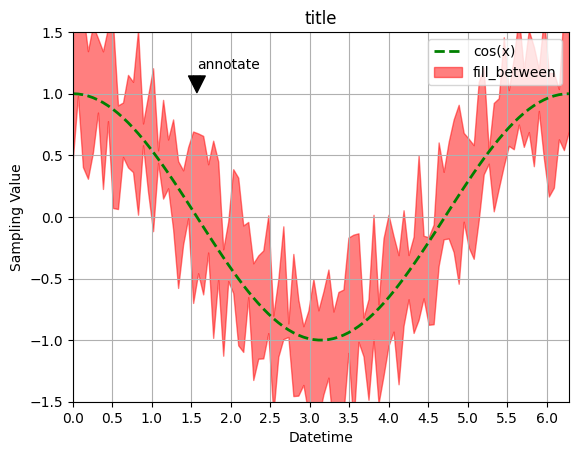

In [48]:
Y1=Y+np.sin(np.random.rand(100))
Y2=Y-np.sin(np.random.rand(100))
fig,ax=plt.subplots()

# 对于ax对象操作除了【绘图】相关的操作
ax.plot(X,Y,color='green',label='cos(x)',linestyle='--',linewidth=2)
# 在【绘图】方法下有可选的操作
# linestyle: - | -- | -. | : | None | ' ' | ''
# linewidth: float
# marker: None | 'o' | 'v' | '^' | '<' | '>' | '1' | '2' | '3' | '4' | 's' | 'p' | '*' | 'h' | 'H' | '+' | 'x' | 'D' | 'd' | '|' | '_' | TICKUP | TICKDOWN | TICKLEFT | TICKRIGHT | CARETLEFT | CARETRIGHT | CARETUP | CARETDOWN | 'None' | ' ' | ''
# color: 'b' | 'g' | 'r' | 'c' | 'm' | 'y' | 'k' | 'w'
# label: str
# markersize: float
# colormap: str
ax.fill_between(X,Y1,Y2,label='fill_between',color='red',alpha=0.5)

# 还有坐标轴的相关操作
# ax.set_xscale('logit')
# ax.set_yscale('log')
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.5,1.5)

# 还有图例的相关操作
ax.legend()

# 以及对坐标轴ticks的操作
# ticks的操作可以分为 locator操作和formatter操作
# locator标记点的位置
# formatter标记点的标签

# 基础操作使用set_xticks和set_xticklabels
# ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
# ax.set_xticklabels(['0','pi/2','pi','3pi/2','2pi'])
# ax.set_yticks([0.1,0.5,1,1.5])
# ax.set_yticklabels(['0.1','0.5','1','1.5'])
# axis更进阶的操作，可以引入ticker进行操作
from matplotlib import ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'{:1.1f}'.format(x)))

# 进行网格线的绘制、文字标记等操作
ax.grid(True)
ax.annotate('annotate',xy=(np.pi/2,1),xytext=(np.pi/2,1.2),arrowprops=dict(facecolor='black',shrink=0.05))

ax.set_title('title')
ax.set_xlabel('Datetime')
ax.set_ylabel('Sampling Value')
fig.show()

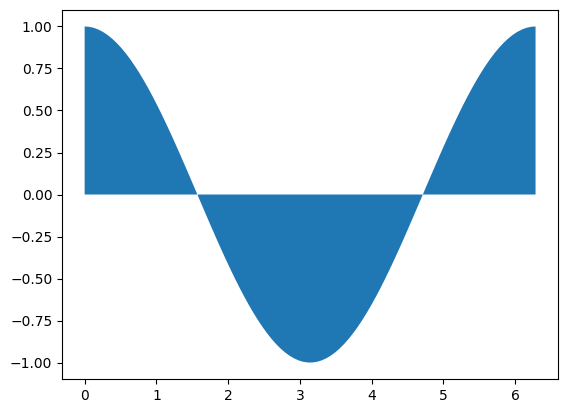

In [61]:
fig,ax=plt.subplots()
ax.fill_between(X,Y,np.zeros(100))
fig.show()